#ロジスティック回帰の学習→予測→評価

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.12.2
1.2.2


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.columns =['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# 前処理

# 文字列の半角スペース削除
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for s in cat_cols:
  df[s] =df[s].str.replace(' ', '')

# United-Statesのレコードに絞り特徴量native-countryを削除
df = df[df['native-country'].isin(['United-States'])]
df = df.drop(['native-country'], axis=1)
df.reset_index(inplace=True, drop=True)

# 正解ラベルの数値への置換
df['income'] = df['income'].replace('<=50K', 0)
df['income'] = df['income'].replace('>50K', 1)

print(df.shape)
df.head()

(29170, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0


In [ ]:
# 特徴量と目的変数の設定
X = df.drop(['income'], axis=1)
y = df['income']

In [ ]:
# カテゴリ変数
X.describe(exclude='number').T

,count,unique,top,freq
workclass,29170,9,Private,20135
education,29170,16,HS-grad,9702
marital-status,29170,7,Married-civ-spouse,13368
occupation,29170,15,Exec-managerial,3735
relationship,29170,6,Husband,11861
race,29170,5,White,25621
gender,29170,2,Male,19488


In [ ]:
# one-hot encoding
X = pd.concat([X, pd.get_dummies(X['workclass'], prefix='workclass', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['education'], prefix='education', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['marital-status'], prefix='marital-status', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['occupation'], prefix='occupation', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['relationship'], prefix='relationship', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['race'], prefix='race', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['gender'], prefix='gender', drop_first=True)], axis=1)
X = X.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender'], axis=1)
print(X.shape)
#X.head()

(29170, 59)


In [ ]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (23336, 59)  y_trainの形状： (23336,)  X_testの形状： (5834, 59)  y_testの形状： (5834,)


In [ ]:
# 学習データとテストデータのラベル件数内訳
print(y_train.value_counts())
print(y_test.value_counts())

0    17599
1     5737
Name: income, dtype: int64
0    4400
1    1434
Name: income, dtype: int64


In [ ]:
# 数値の特徴量
X.columns[0:6]

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
# 特徴量の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 変換器の作成
num_cols =  X.columns[0:6] # 数値型の特徴量を取得
scaler.fit(X_train[num_cols]) # 学習データでの標準化パラメータの計算
X_train[num_cols] = scaler.transform(X_train[num_cols]) # 学習データの変換
X_test[num_cols] = scaler.transform(X_test[num_cols]) # テストデータの変換

display(X_train.iloc[:2]) # 標準化された学習データの特徴量

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
14415,-0.414934,2.618674,-0.482654,0.286912,-0.220058,0.780378,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
24513,-1.286423,-0.861896,-0.066531,-0.149041,-0.220058,-2.288775,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# モデルの学習
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデル
model = LogisticRegression(max_iter=100, multi_class = 'ovr', solver='liblinear', C=0.1, penalty='l1', random_state=0)
model.fit(X_train, y_train)
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 予測の確率のリスト
model.predict_proba(X_test)

array([[0.61193763, 0.38806237],
       [0.76941821, 0.23058179],
       [0.82273794, 0.17726206],
       ...,
       [0.00571831, 0.99428169],
       [0.98302486, 0.01697514],
       [0.97352591, 0.02647409]])

In [ ]:
# 予測のラベルのリスト
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# 正解ラベルのリスト
y_test.values # pandasをnumpyに変換

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
ac_score = accuracy_score(y_test, y_test_pred)
print('accuracy = %.2f' % (ac_score))

f1 = f1_score(y_test, y_test_pred)
print('F1-score = %.2f' % (f1))

accuracy = 0.84
F1-score = 0.64


Text(45.722222222222214, 0.5, 'label')

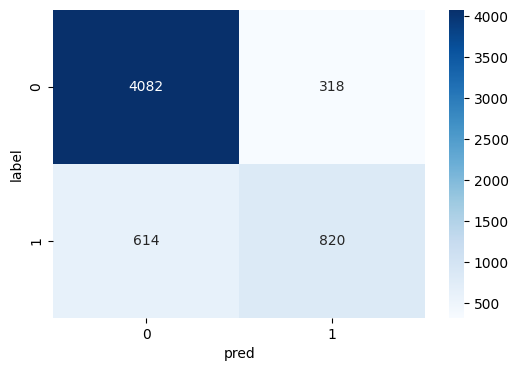

In [ ]:
# 混同行列
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

#予測値の解釈

In [ ]:
# パラメータ
print('回帰係数 w = [w1, w2, … , w59]:', model.coef_[0])
print('')
print('定数項 w0:', model.intercept_)

回帰係数 w = [w1, w2, … , w59]: [ 3.27674538e-01  6.68212471e-02  7.45174434e-01  2.34070821e+00
  2.49981821e-01  3.74822075e-01  6.06189384e-01  0.00000000e+00
  0.00000000e+00  2.09080180e-01  3.30936895e-01 -2.45288182e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.26841711e-01 -1.06256122e-02 -2.25874279e-02  0.00000000e+00
 -3.85130766e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.73044414e+00  0.00000000e+00
 -4.34169414e-01 -7.33680506e-04  0.00000000e+00  5.96469336e-02
  0.00000000e+00  1.53976931e-01  8.24601892e-01 -7.34956579e-01
 -4.34596377e-01 -1.43075119e-01 -5.92221825e-01  0.00000000e+00
  5.00484413e-01  6.02283173e-01  3.64388042e-01  5.71737782e-01
  0.00000000e+00  0.00000000e+00 -3.77237752e-01 -9.28152548e-01
 -4.20760506e-02  1.15000572e+00  0.00000000e+00 -1.18467654e-01
  0.00000000e+00  0.00000000e+00  7.38637999e-01]

定数項 w0: [-3

In [ ]:
# 特徴量の列テキスト表示
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupa

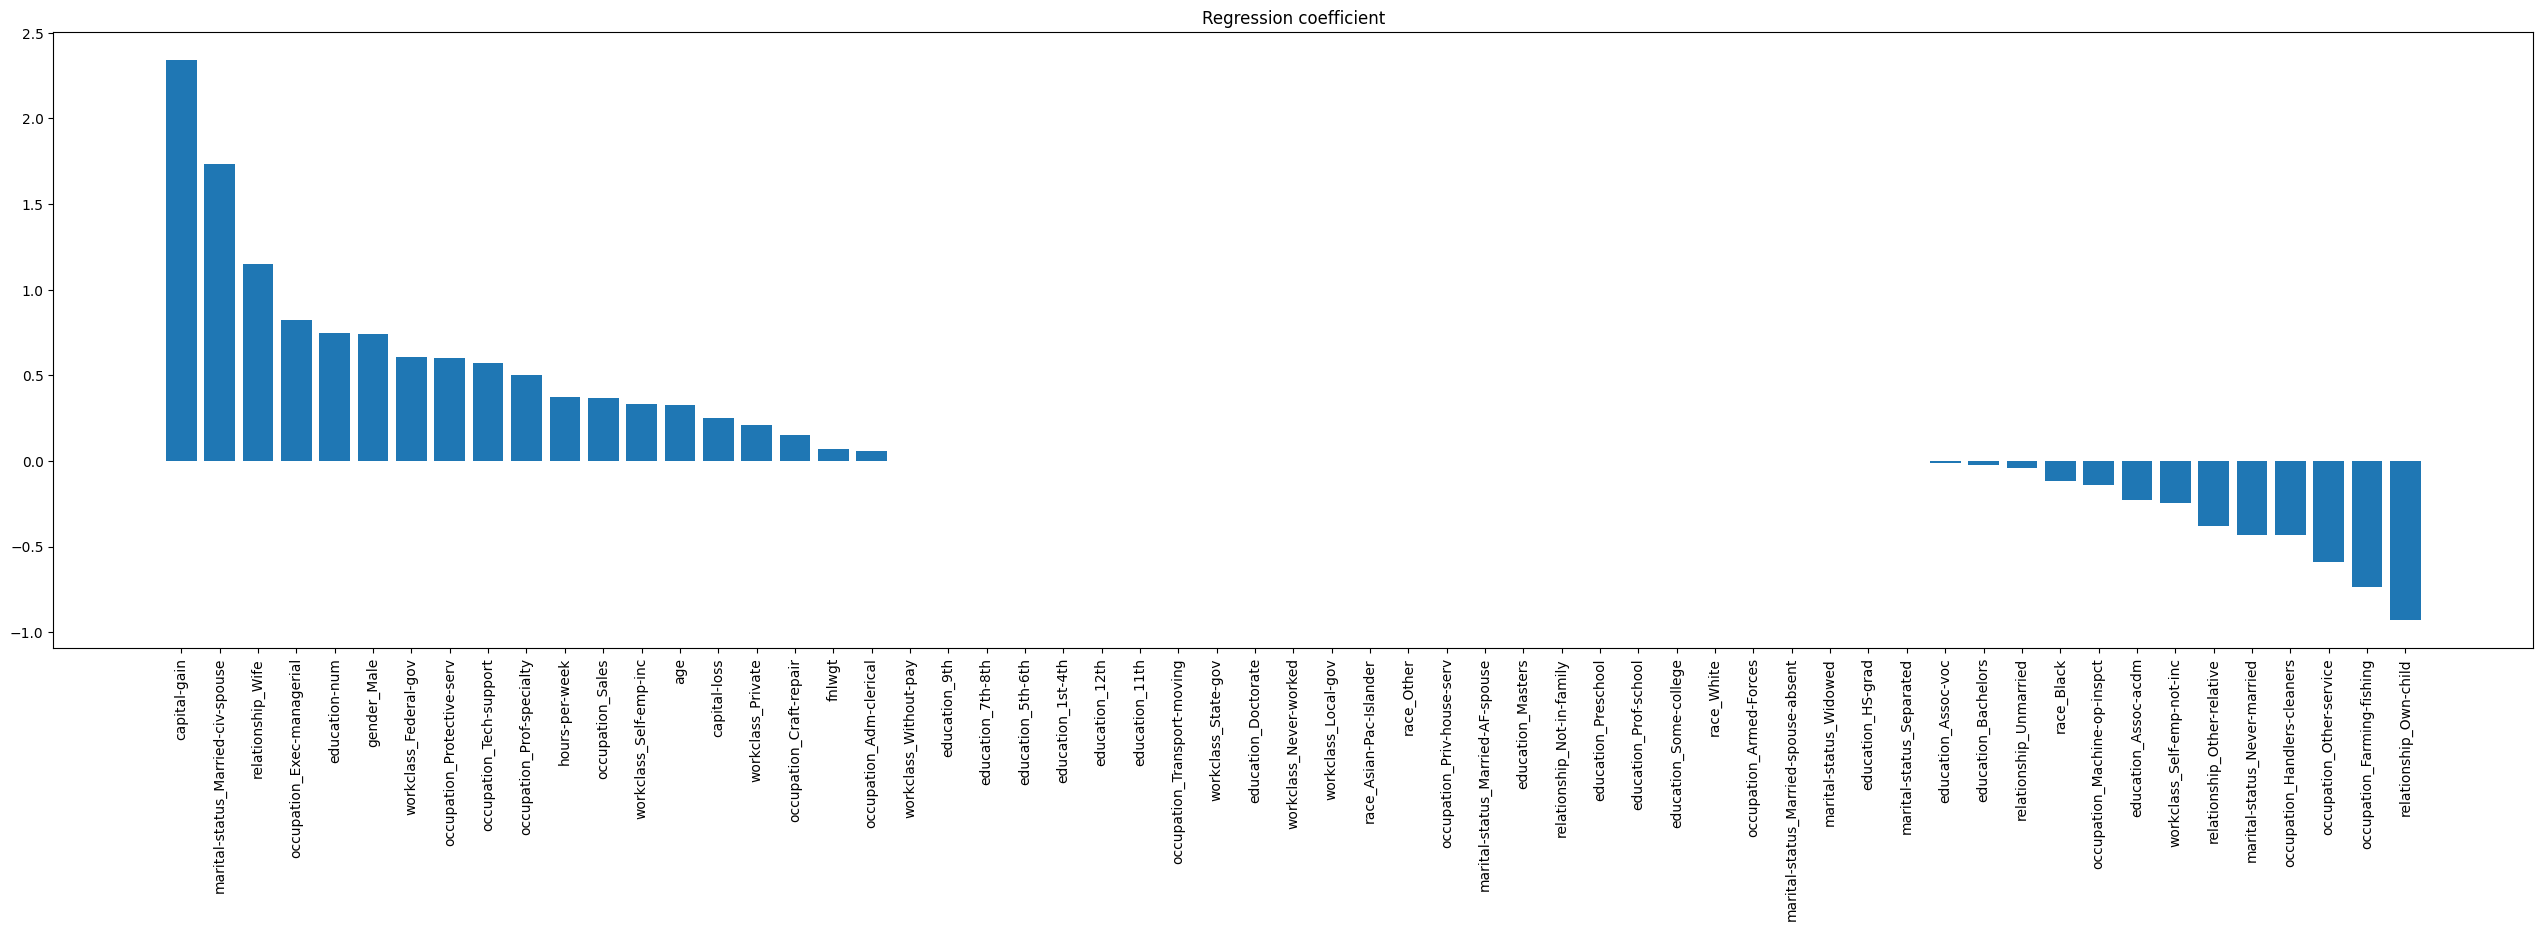

In [ ]:
# 回帰係数の可視化
importances = model.coef_[0] # 回帰係数
indices = np.argsort(importances)[::-1] # 回帰係数を降順にソート

plt.figure(figsize=(32, 8)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(len(indices)), importances[indices]) # 棒グラフを追加
plt.xticks(range(len(indices)), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加

plt.show() # プロットを表示

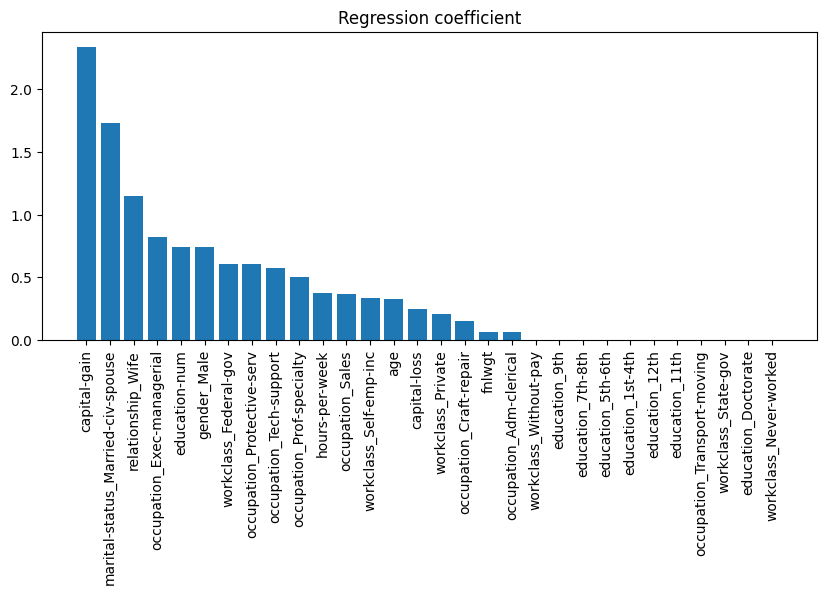

In [ ]:
# 回帰係数（上位30件）の可視化
importances = model.coef_[0] # 回帰係数
indices = np.argsort(importances)[::-1][:30] # 回帰係数を降順にソート

plt.figure(figsize=(10, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(len(indices)), importances[indices]) # 棒グラフを追加
plt.xticks(range(len(indices)), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加

plt.show() # プロットを表示

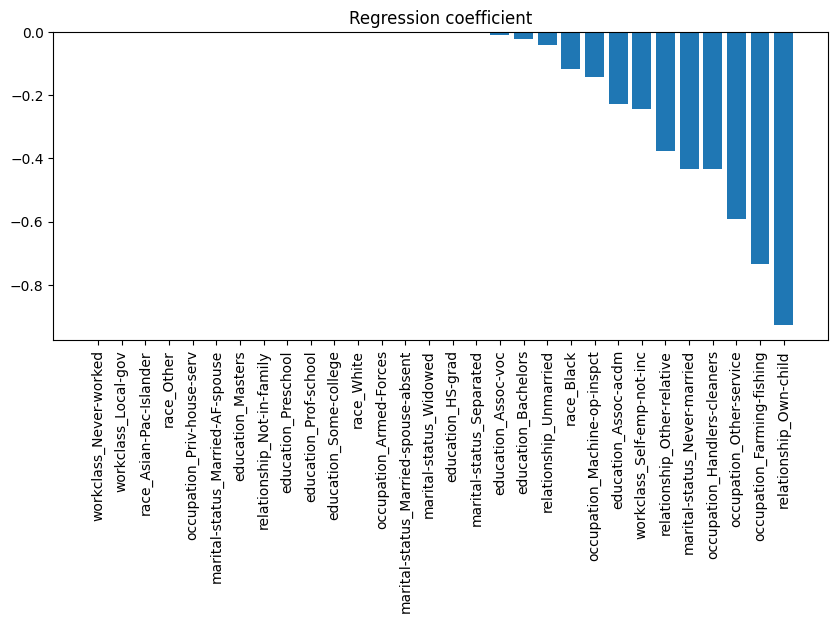

In [ ]:
# 回帰係数（下位30件）の可視化
importances = model.coef_[0] # 回帰係数
indices = np.argsort(importances)[::-1][-30:] # 回帰係数を降順にソート

plt.figure(figsize=(10, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(len(indices)), importances[indices]) # 棒グラフを追加
plt.xticks(range(len(indices)), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加

plt.show() # プロットを表示

In [ ]:
# 最後から3件目のクラス0とクラス1の確率
model.predict_proba(X_test)[-3]

array([0.00571831, 0.99428169])

In [ ]:
# 最後から3件目の特徴量
print('最後から3件目の特徴量 X = [x1, x2, … , x59]:', X_test.values[-3]) # pandasをnumpyに変換

最後から3件目の特徴量 X = [x1, x2, … , x59]: [ 1.40066795 -0.3719913  -0.48265407  1.82081142 -0.22005784  1.58804948
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          1.        ]


In [ ]:
# 最後から3件目 logit = w × X + w0 
logit = sum(np.multiply(model.coef_[0] , X_test.values[-3])) + model.intercept_
logit

array([5.15834652])

In [ ]:
# シグモイド関数でlogitから確率に変換
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(logit)

array([0.99428169])